# Loading in data

In [1]:
import numpy as np

from tensorflow.keras.utils import image_dataset_from_directory

from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load 1

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
train_path = "drive/MyDrive/Cassava/train/train"

train_ds = image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=100,
    image_size=(500, 500),
    shuffle=True,
    seed=1,
    validation_split=.2,
    subset="training",
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

validation_ds = image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=100,
    image_size=(500, 500),
    shuffle=True,
    seed=1,
    validation_split=.2,
    subset="validation",
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5656 files belonging to 5 classes.
Using 4525 files for training.
Found 5656 files belonging to 5 classes.
Using 1131 files for validation.


In [3]:
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

from keras.utils.vis_utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.metrics import Recall, AUC, Precision

In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## Base Model

In [ ]:
rescaling_layer = layers.experimental.preprocessing.Rescaling(
    scale=1. / 255,
    input_shape=(500, 500, 3)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 flatten (Flatten)           (None, 750000)            0         
                                                                 
 dense (Dense)               (None, 64)                48000064  
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 48,000,389
Trainable params: 48,000,389
Non-trainable params: 0
_________________________________________________________________


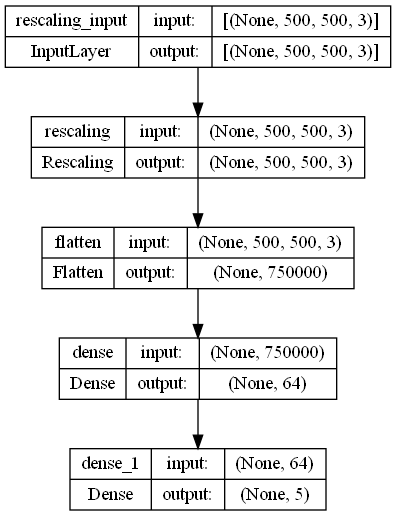

In [ ]:
model = Sequential()

model.add(rescaling_layer)

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = model.fit(train_ds, validation_data=validation_ds, epochs= 40,
                        validation_split = 0.2)

Epoch 1/40
71/71 [==============================] - 21s 293ms/step - loss: 1.4068 - accuracy: 0.4707 - val_loss: 1.4098 - val_accuracy: 0.4668
Epoch 2/40
71/71 [==============================] - 25s 340ms/step - loss: 1.3965 - accuracy: 0.4707 - val_loss: 1.4011 - val_accuracy: 0.4668
Epoch 3/40
71/71 [==============================] - 25s 334ms/step - loss: 1.3877 - accuracy: 0.4707 - val_loss: 1.3934 - val_accuracy: 0.4668
Epoch 4/40
71/71 [==============================] - 25s 331ms/step - loss: 1.3801 - accuracy: 0.4707 - val_loss: 1.3869 - val_accuracy: 0.4668
Epoch 5/40
71/71 [==============================] - 25s 335ms/step - loss: 1.3736 - accuracy: 0.4707 - val_loss: 1.3815 - val_accuracy: 0.4668
Epoch 6/40
71/71 [==============================] - 25s 339ms/step - loss: 1.3680 - accuracy: 0.4707 - val_loss: 1.3770 - val_accuracy: 0.4668
Epoch 7/40
71/71 [==============================] - 29s 391ms/step - loss: 1.3633 - accuracy: 0.4707 - val_loss: 1.3731 - val_accuracy: 0.4668

KeyboardInterrupt: 

## Model 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 165, 165, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 161, 161, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)       

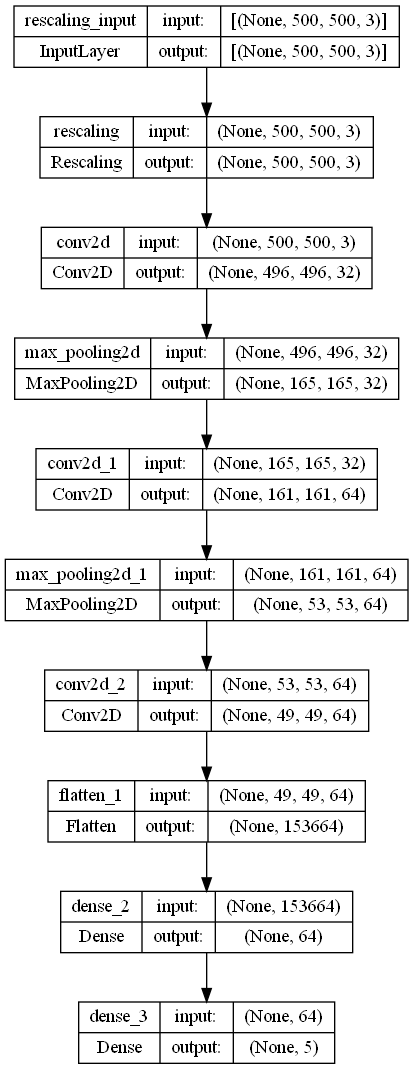

In [ ]:
model1 = Sequential()

model1.add(rescaling_layer)

model1.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (500, 500, 3)))

model1.add(MaxPooling2D(pool_size = (3, 3)))

model1.add(Conv2D(64, (5, 5), activation = "relu"))
model1.add(MaxPooling2D(pool_size = (3, 3)))
model1.add(Conv2D(64, (5, 5), activation = "relu"))

model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(5, activation="softmax"))

model1.summary()
plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model1.fit(train_ds, validation_data= validation_ds, epochs= 1,
                        validation_split = 0.2)

46/46 [==============================] - 710s 14s/step - loss: 0.0396 - accuracy: 0.9947 - val_loss: 3.6043 - val_accuracy: 0.5261


## Model 2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 496, 496, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 165, 165, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 161, 161, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 49, 49, 64)       

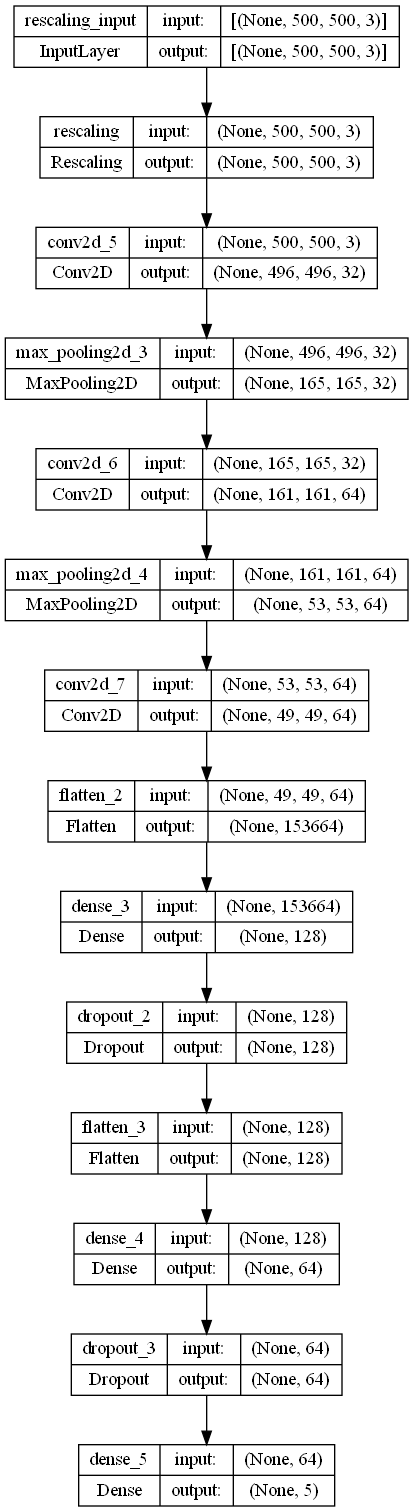

In [ ]:
model2 = Sequential()

model2.add(rescaling_layer)

model2.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (500, 500, 3), kernel_regularizer = l2(5e-4) ))

model2.add(MaxPooling2D(pool_size = (3, 3)))

model2.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(5e-4)))
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(5e-4)))

model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation="softmax"))

model2.summary()
plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)

In [ ]:
history2 = model2.fit(train_ds, validation_data= validation_ds, epochs= 40,
                        validation_split = 0.2, callbacks = [callback])

Epoch 1/40
46/46 [==============================] - 539s 11s/step - loss: 1.6318 - accuracy: 0.4471 - val_loss: 1.3621 - val_accuracy: 0.4668
Epoch 2/40
46/46 [==============================] - 487s 11s/step - loss: 1.3328 - accuracy: 0.4855 - val_loss: 1.2774 - val_accuracy: 0.4951
Epoch 3/40
46/46 [==============================] - 475s 10s/step - loss: 1.2596 - accuracy: 0.5490 - val_loss: 1.2414 - val_accuracy: 0.5615
Epoch 4/40
46/46 [==============================] - 472s 10s/step - loss: 1.2139 - accuracy: 0.5733 - val_loss: 1.1759 - val_accuracy: 0.5738
Epoch 5/40
46/46 [==============================] - 468s 10s/step - loss: 1.1929 - accuracy: 0.5845 - val_loss: 1.2243 - val_accuracy: 0.5632
Epoch 6/40
46/46 [==============================] - 470s 10s/step - loss: 1.1690 - accuracy: 0.5947 - val_loss: 1.1651 - val_accuracy: 0.5827
Epoch 7/40
46/46 [==============================] - 471s 10s/step - loss: 1.1704 - accuracy: 0.5960 - val_loss: 1.1475 - val_accuracy: 0.5915
Epoch 

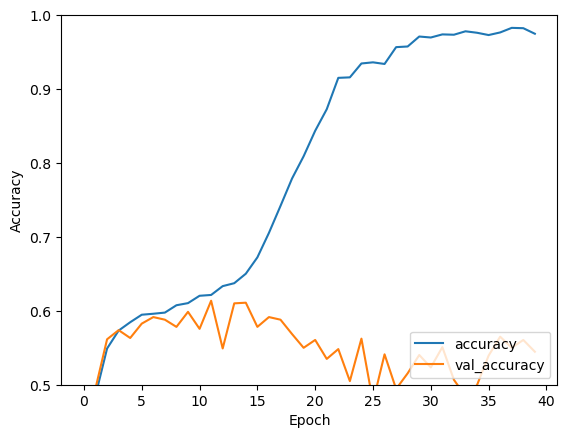

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
model2.save("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [ ]:
healthy_leaf = Image.open("Data/healthy_leaf.jpg")

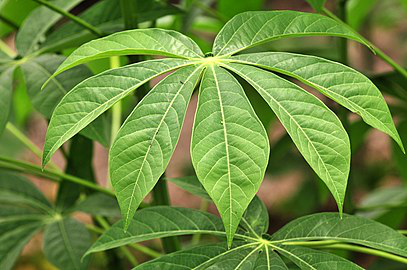

In [ ]:
healthy_leaf

In [ ]:
healthy_leaf_array = np.resize(np.array(healthy_leaf), (500,500,3))

In [ ]:
healthy_leaf_array.shape

(500, 500, 3)

In [ ]:
prediction = model2.predict(healthy_leaf_array)

ValueError: in user code:

    File "C:\Users\musaa\anaconda3\envs\Mercury\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\musaa\anaconda3\envs\Mercury\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\musaa\anaconda3\envs\Mercury\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\musaa\anaconda3\envs\Mercury\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\musaa\anaconda3\envs\Mercury\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\musaa\anaconda3\envs\Mercury\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 500, 500, 3), found shape=(None, 500, 3)


## Load 2

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range= (.7,1.3)
        )

folder_path = "drive/MyDrive/Cassava/Data/train"

for folder in os.listdir(folder_path):
  img_path = folder_path + "/" + folder
  for img in os.listdir(img_path):
    if img.startswith("train"):
      x = load_img(img_path + "/" + img)  # this is a PIL image
      x = img_to_array(x)  # this is a Numpy array with rank 3
      x = x.reshape((1,) + x.shape)  # this is a Numpy array with rank 4
      datagen.flow(x, batch_size=1, save_to_dir=img_path, save_prefix='aug', save_format='jpeg')

In [ ]:
len(os.listdir("drive/MyDrive/Cassava/Data/train/cbb"))

372

In [ ]:
batch_size = 128
train_path = "drive/MyDrive/Cassava/Data/train"
val_path = "drive/MyDrive/Cassava/Data/val"
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rotation_range=40,
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range= (.7,1.3))

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(500, 500),  # all images will be resized to 150x150
        batch_size=batch_size)

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        val_path,
        target_size=(500, 500),
        batch_size=batch_size)


Found 9331 images belonging to 5 classes.
Found 563 images belonging to 5 classes.


## Model 3

In [4]:
train_ds = image_dataset_from_directory(
    "drive/MyDrive/Cassava/Data/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=100,
    image_size=(500, 500),
    shuffle=True,
    seed=1,
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val_ds = image_dataset_from_directory(
    "drive/MyDrive/Cassava/Data/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=100,
    image_size=(500, 500),
    shuffle=True,
    seed=1,
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test_ds = image_dataset_from_directory(
    "drive/MyDrive/Cassava/Data/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=100,
    image_size=(500, 500),
    shuffle=True,
    seed=1,
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4669 files belonging to 5 classes.
Found 563 files belonging to 5 classes.
Found 571 files belonging to 5 classes.


In [ ]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [6]:
rescaling_layer = layers.experimental.preprocessing.Rescaling(
    scale=1. / 255,
    input_shape=(500, 500, 3)
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 496, 496, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 165, 165, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 161, 161, 64)      51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 49, 49, 64)       

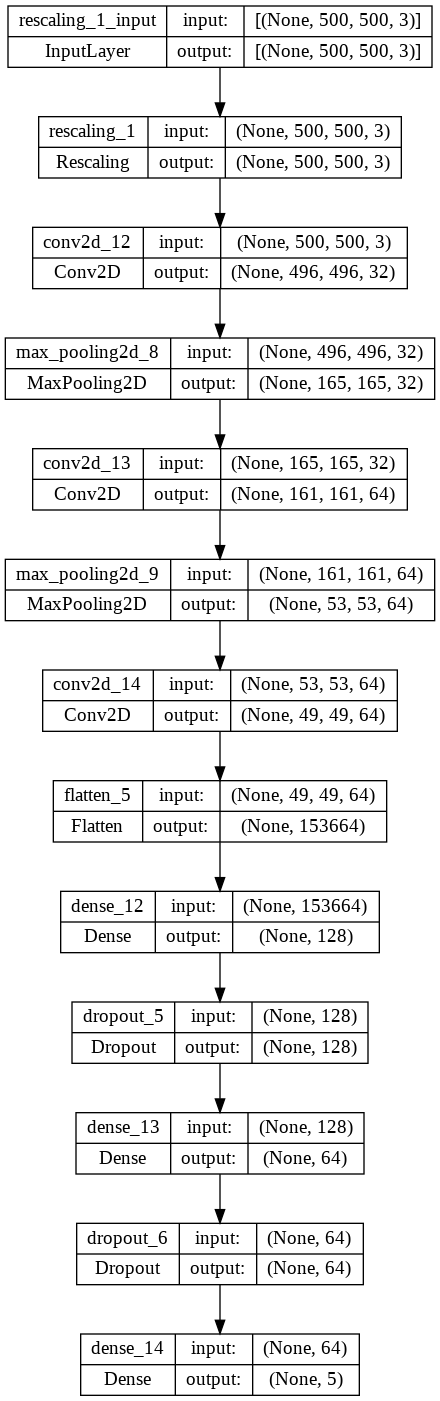

In [ ]:
model3 = Sequential()

model3.add(rescaling_layer)

model3.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (500, 500, 3), kernel_regularizer = l2(.01) ))

model3.add(MaxPooling2D(pool_size = (3, 3)))

model3.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))
model3.add(MaxPooling2D(pool_size = (3, 3)))
model3.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))

model3.add(Flatten())
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(64, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(5, activation="softmax"))

model3.summary()
plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy', "AUC", "Recall"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tb_callback = TensorBoard(log_dir="./logs")

In [ ]:
history3 = model3.fit(train_ds, validation_data= val_ds, epochs= 100, callbacks = [es_callback, tb_callback])

Epoch 1/100
46/46 [==============================] - 13s 225ms/step - loss: 2.3261 - accuracy: 0.4431 - auc: 0.7292 - recall: 0.1685 - val_loss: 1.7455 - val_accuracy: 0.4725 - val_auc: 0.7856 - val_recall: 0.2362
Epoch 2/100
46/46 [==============================] - 11s 215ms/step - loss: 1.6878 - accuracy: 0.5140 - auc: 0.7800 - recall: 0.2425 - val_loss: 1.5650 - val_accuracy: 0.5400 - val_auc: 0.8070 - val_recall: 0.4067
Epoch 3/100
46/46 [==============================] - 11s 217ms/step - loss: 1.5694 - accuracy: 0.5499 - auc: 0.7976 - recall: 0.2972 - val_loss: 1.4667 - val_accuracy: 0.5648 - val_auc: 0.8206 - val_recall: 0.4192
Epoch 4/100
46/46 [==============================] - 11s 216ms/step - loss: 1.4910 - accuracy: 0.5562 - auc: 0.8101 - recall: 0.3223 - val_loss: 1.3898 - val_accuracy: 0.5968 - val_auc: 0.8367 - val_recall: 0.4067
Epoch 5/100
46/46 [==============================] - 11s 215ms/step - loss: 1.3918 - accuracy: 0.5897 - auc: 0.8297 - recall: 0.4009 - val_loss:

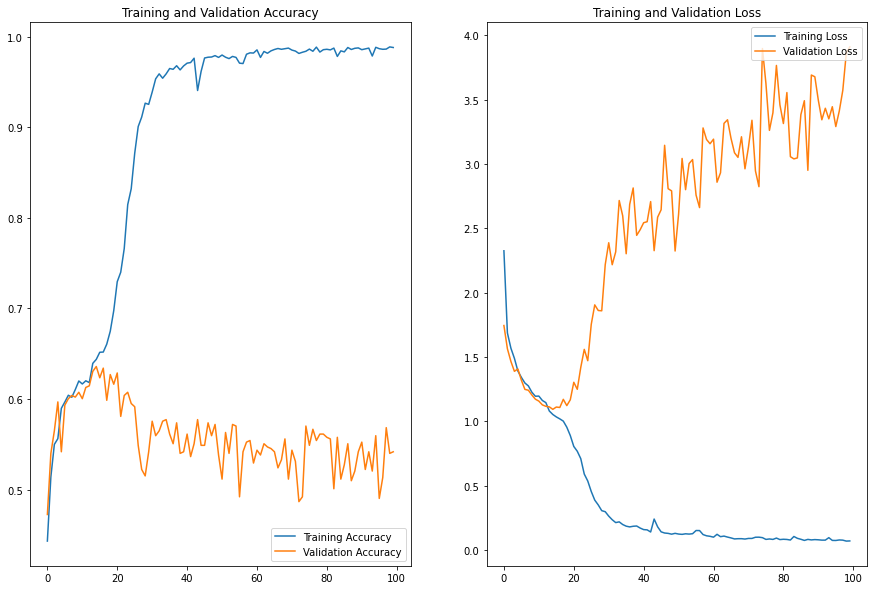

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [15]:
from tensorflow import concat

In [16]:
from tensorflow.math import confusion_matrix

In [17]:
import torch

In [19]:
probabilities = model3.predict(test_ds)

NameError: ignored

In [ ]:
predictions = (probabilities > .5).astype('int')
predictions[0:5]

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
_ ,test_accuracy, test_AUC, test_Recall = model3.evaluate(test_ds, verbose=1)
print(test_accuracy, test_AUC, test_Recall)

6/6 [==============================] - 1s 109ms/step - loss: 4.8329 - accuracy: 0.5972 - auc: 0.7843 - recall: 0.5937
0.5971978902816772 0.7843081951141357 0.5936952829360962


In [ ]:
test_ds.class_names

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [ ]:
type(test_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predictions

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
true_categories = concat([y for x, y in test_ds], axis=0)

In [ ]:
true_categories

<tf.Tensor: shape=(571, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)>

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model3.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

3/3 [==============================] - 0s 25ms/step


In [ ]:
predictions.shape

(571,)

In [ ]:
labels.shape

(571,)

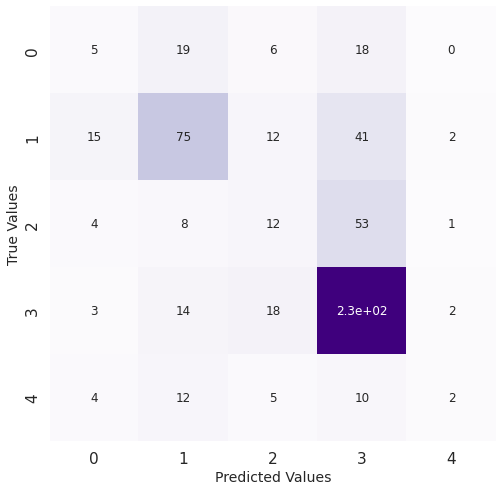

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, predictions)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [ ]:
test_ds

array([1., 1., 3., 1., 3., 1., 1., 1., 3., 3., 3., 1., 3., 1., 1., 2., 2.,
       3., 2., 1., 1., 3., 0., 1., 0., 0., 1., 3., 1., 2., 2., 3., 3., 1.,
       2., 3., 0., 3., 3., 2., 3., 4., 1., 3., 3., 4., 1., 3., 3., 3., 2.,
       3., 3., 1., 1., 0., 2., 1., 4., 2., 2., 1., 3., 1., 3., 0., 0., 1.,
       0., 3., 3., 3., 0., 3., 2., 1., 3., 3., 3., 3., 3., 3., 1., 3., 1.,
       0., 3., 3., 3., 3., 3., 3., 3., 0., 3., 3., 1., 1., 1., 1., 2., 2.,
       3., 3., 1., 3., 4., 0., 3., 3., 2., 3., 1., 0., 1., 3., 1., 1., 2.,
       0., 3., 1., 2., 0., 4., 4., 3., 3., 3., 0., 3., 3., 1., 2., 1., 3.,
       4., 3., 4., 1., 3., 3., 0., 2., 1., 3., 4., 1., 3., 3., 3., 1., 3.,
       3., 1., 3., 2., 3., 2., 1., 3., 3., 0., 3., 2., 3., 3., 3., 3., 3.,
       3., 1., 1., 2., 1., 4., 1., 1., 4., 1., 1., 1., 3., 3., 4., 0., 1.,
       2., 2., 2., 0., 4., 1., 3., 3., 2., 2., 2., 3., 3., 1., 3., 0., 3.,
       3., 3., 3., 3., 3., 3., 4., 3., 3., 4., 0., 1., 1., 3., 1., 1., 2.,
       3., 3., 0., 1., 2.

## Model 4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 165, 165, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 161, 161, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)       

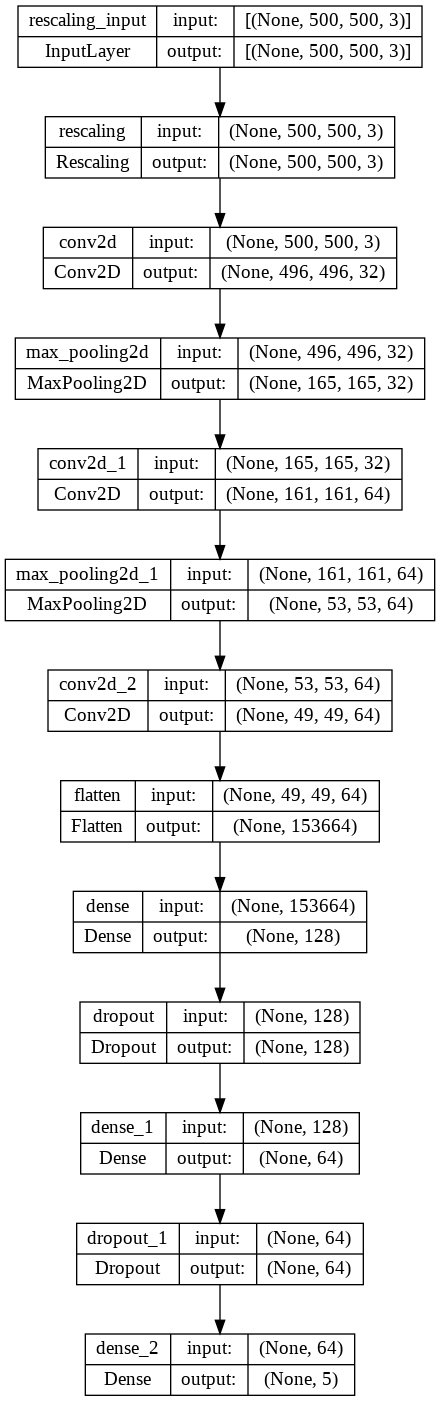

In [7]:
model4 = Sequential()

model4.add(rescaling_layer)

model4.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (500, 500, 3), kernel_regularizer = l2(.01) ))

model4.add(MaxPooling2D(pool_size = (3, 3)))

model4.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))
model4.add(MaxPooling2D(pool_size = (3, 3)))
model4.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))

model4.add(Flatten())
model4.add(Dense(128, activation="relu"))
model4.add(Dropout(0.2))

model4.add(Dense(64, activation="relu"))
model4.add(Dropout(0.2))

model4.add(Dense(5, activation="softmax"))

model4.summary()
plot_model(model4, show_shapes=True, show_layer_names=True)

In [8]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy', "AUC", "Recall"])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
es_callback = EarlyStopping(monitor='val_loss', patience=5)

In [11]:
from tensorflow.keras.callbacks import TensorBoard
tb_callback = TensorBoard(log_dir="./logs")

In [21]:
history4 = model4.fit(train_ds, validation_data= val_ds, epochs= 100, callbacks = [es_callback, tb_callback])

Epoch 1/100
47/47 [==============================] - 11s 215ms/step - loss: 0.9935 - accuracy: 0.6089 - auc: 0.8887 - recall: 0.4538 - val_loss: 1.3324 - val_accuracy: 0.4760 - val_auc: 0.8149 - val_recall: 0.3872
Epoch 2/100
47/47 [==============================] - 11s 216ms/step - loss: 0.9352 - accuracy: 0.6425 - auc: 0.9022 - recall: 0.5010 - val_loss: 1.4976 - val_accuracy: 0.4565 - val_auc: 0.7921 - val_recall: 0.3943
Epoch 3/100
47/47 [==============================] - 11s 217ms/step - loss: 0.8874 - accuracy: 0.6674 - auc: 0.9126 - recall: 0.5337 - val_loss: 1.6963 - val_accuracy: 0.4334 - val_auc: 0.7682 - val_recall: 0.3730
Epoch 4/100
47/47 [==============================] - 11s 216ms/step - loss: 0.7707 - accuracy: 0.7154 - auc: 0.9353 - recall: 0.6179 - val_loss: 1.9246 - val_accuracy: 0.3783 - val_auc: 0.7338 - val_recall: 0.3304
Epoch 5/100
47/47 [==============================] - 11s 216ms/step - loss: 0.6444 - accuracy: 0.7648 - auc: 0.9566 - recall: 0.6944 - val_loss:

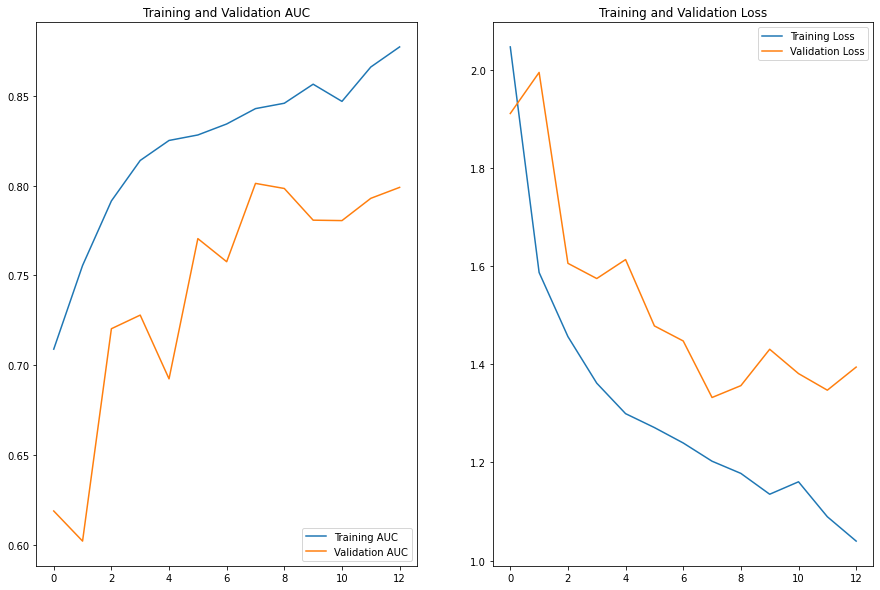

In [14]:
acc = history4.history['auc']
val_acc = history4.history['val_auc']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(13)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC')
plt.plot(epochs_range, val_acc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [18]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model4.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

3/3 [==============================] - 0s 61ms/step


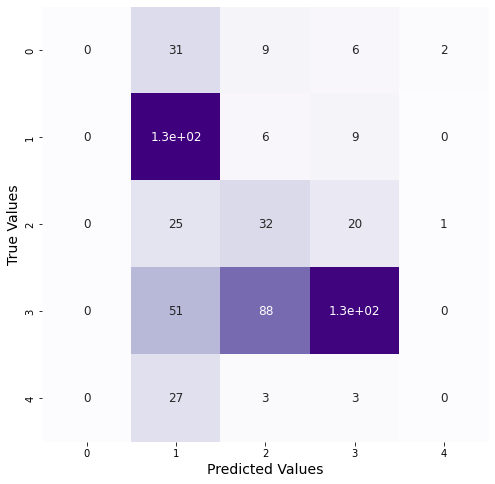

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, predictions)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()